<font color="#483D8B">
<h1  align="center"> Textual classification
<div align="center">
<font size=3><b>
<br>Ruobing Wang
<br>March 15, 2019
<br></font></b></div>

## Overview

Text classification is the task of automatically classify the text documents into one or more defined categories. It can be used in Detection of spam and non spam emails etc. Text classifiers can be used to organize and categorize pretty. For here, we continue using the dataset of 20 newsgroups which contains approximately 20,000 newsgroup documents, across 20 different newsgroups. Because we need the documents and a fixed set of classes as our input and the output will be the predict class from the sets. For the classification methods, we can use both Hand- coded rules or supervised machine learning. For here, I will use the Naive Bayes and Support Vector Machine as classifier to get our output and then use Grid search to improve the accuracy.  
### Objectives

- Textual pipeline
 - Textual classification
		- Naive Bayes 
		- Support Vector Machine
- Grid search

### Reference 

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

https://www.quora.com/What-are-popular-text-classification-algorithms-in-commercial-use-and-how-are-they-used

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

-------------

## Data

The data is related with The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

 <br/>


What is inside:
It has 20 different news organizations and each mpas the different themes. Some of them are very closely to each other and others are highly unrelated. 

The followings are the list of the 20 newsgroups:

-----------------------------
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x	

------------------------------
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey	

-----------------------------
sci.crypt
sci.electronics
sci.med
sci.space

-----------------------------
misc.forsale	

-----------------------------
talk.politics.misc
talk.politics.guns
talk.politics.mideast	

-----------------------------
talk.religion.misc
alt.atheism
soc.religion.christian



- The background information of the data can be found at https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html#newsgroups



Loading the 20 newsgroups dataset

Background of the Dataset:

This dataset is a collection of approximately 20,000 newsgroup documents, nearly evenly across 20 different newsgroups. All of the information are collected by Ken Lang for his paper. 

This data has become a popular data set fir experiments for such as text classification and text clustering.


Since in the fetch_20newsgroups, includes two parts, one for training (or development) and the other one for testing (or for performance evaluation). We will just use the data for training. And, in conclusion, in this step, we can choose the data which is matched in the categories and trained after we randomly shuffle.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from time import time
print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:2000]
print("done in %0.3fs." % (time() - t0))
print(" ")
print("Summary of the dataset:")
newsgroups_train = fetch_20newsgroups(subset="train", shuffle = True)
newsgroups_test = fetch_20newsgroups(subset="test", shuffle = True)
print(list(newsgroups_train.target_names))

Loading dataset...
done in 1.335s.
 
Summary of the dataset:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']



---------------


## Exploratory Data Analysis

At first, in the 20 available categories, in order to make the execution times shorter, we choose 4 topics of them.

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

Then, load the list of files matching those 4 categories:

In [3]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)


And then we have the object which can be accessed as dict or object in python for convenience. Now, the object includes the following categories.

Then, lets see the summary of the datasets we chose.

In [4]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

We have the requested category names which is good and we can use the data attribute also names: 

In [5]:
len(twenty_train.data)

2257

In [6]:
len(twenty_train.filenames)

2257

Let's see the first line of the first loaded file:

In [7]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))


print(twenty_train.target_names[twenty_train.target[0]])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
comp.graphics


In the supervised learning algorithms, it requires a category label for each document, for here, we have the index of the category name and we store this as the integer. These integers are stored in the target attribute. Every number(category) is the name of the newsgroup, we can see how they mapped from the following: 

In [8]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [9]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


Because we shuffled randomly in the fetch_20newsgroups function which is useful for us since we wish to select only a subset of samples to train a model and get the results quickly.

### Extracting features from text files

In this dataset, it has two parts: one for training (or development) and the other one for testing (or for performance evaluation).

At first we need to turn the text content into numerical feature vectors since we want to perform machine learning on text documents for performing machine learning on text documents

The bag of words is a way of extracting features from text for use in modeling. It is a representation of text that describes the occurrence of words within a document. We do not need to consider of the order and structure of words just concern whether known words occur in the document or not.
 
It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

### Tokenizing text with scikit learn

### Fit and transform:

- Fit: apply the algorithm to the data and find a proper algorithm and will the algorithm, 
    
- Transform, only the count vectorizer and tfidf_transformer have transform function, basically it will creat a copy and mutate the copy and return a new copy.

By using CountVectorizer, which includes Text preprocessing, tokenizing and filtering of stopwords (split the sentence to words). We can build a dictionary of features and transform documents to feature vectors

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

Once the CountVectorizer fitted, it will built a dictionary to provide the feature indices. For here, we have the unicode of the 'algorithm' which is 4690 for here.

In [11]:
count_vect.vocabulary_.get(u'algorithm')

4690

### From occurrences to frequencies

If we calculate the occurrence, it will have problems such that the longer documents have higher average count values than shorter and there are some uninformative words in the document.

#### Term Frequency
To avoid the first problem, we can divide the number of the occurrences of each word in a document by total number of words in the document.

#### Term Frequency times Inverse Document Frequency
To deal with the second problem, we can downscale the weights of each word and why we do in this way is less informative words will only occur in a smaller portion of the corpus.

For the conclusion:

- TF
    - Just counting the number of words in each document has 1 issue: it will give more weightage to longer documents than shorter documents. To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.

- TF-IDF
    - we can even reduce the weightage of more common words like (the, is, an etc.) which occurs in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.

At first we fit our estimator to the data and then transform the count- matrix to a tf-idf presentation or we can also combine these two steps by using .fit_transform

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

## Models

For supervised machine learning, we can use any kind of classifier like:
- Naive Bayes
- Logistic regression
- Support vector machines
- k-Nearest Neighbors
- ...

### Training a classifier

Let's start with naive Bayes classifier:

#### Multinomial Naive Bayes Classifier

Naive Bayes classifier is another method to extract features. Multinomial distribution here, we use the counts from tf-idf from above. 

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class , where y is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability  of feature $P(x_i \mid y)$ appearing in a sample belonging to class .

The parameters $\theta_{y}$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature  appears in a sample of class $T$ in the training set , and  is the total count of all features for class .

The smoothing priors $\alpha \ge 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$ is called Lidstone smoothing.

https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

For understanding let's see this example:

I have a sentence "A very close game" a training set of 5 sentences like "A great game" "The election was over" "Very clean match" "A clean but forgettable game" "A close election" and the category (Sports or Not sports). THe Naive Bayes classifier we need to give it a naive assumption like the every feature is independent to others. We calculate the probability P(Sports| A very close game) etc. P(category| sentence).

Then we extract features of text (what we did before). Then convert the the probability to let us easy to calculate use the principle of conditional probability which is 
$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$
we want to find which category has a higher probability. Thus we can just discard the divisor simply we can compare the numerator. But we have another problem which is to count the occurrence of the sentence in the Sports category. For this example since it is not in the training model, the probability is zero.
To fix that, we need to be naive to accept the assumption that every word is independent of one another. So we can look at the individual words in the sentence instead of the whole sentence.
$$P(a very close game) = P(a)*P(very)*P(close)*P(game)$$
Then just to see which one have a higher probability when face the condition Sports or Not Sports. But since sometimes we do not have the word exist in the dataset, which the prob will equal to zero and lead to the whole sentence's probability equals to zero. To fix that, we can use Laplace smoothing. The function we talk above. For simply set the parameters we can let the division always greater than 1 and let the probability never be zero.

So, we can see from this, our category will be the 4 categories and sentences are from the 20 newsgroup dataset. Let's say I have a sentence "God is love" in Christian, So the probability will be P(Christian|"God is love") and we can calculate the probability of $P(God is love) = P(God)*P(is)*P(love)$ 

Okay, let's see the parameters now:

At first, we calculate the frequencies by tfidf and fit the estimator to data and transform to a tfidf representation(X_train_tfidf)

Then we fit the tfidf representation form and the 4 categories(atheism, graphics, med and Christian) in the Multinomial

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

We using the MultinomialNB algorithm to fit the data we used in tf-idf as our feature counts to the integer id of categories.

In [15]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


Then we use a list example of sentence to predict the categories where it may from.

### Building a pipeline

Since we use vectorizer => transformer => classifier three steps to reach our goal, we can just simplify that with building a pipeline.

Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting to None.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline


*-----------------------------------------------------------------------------------------------------*

Pipeline will gather the 3 or (several) steps to one step. Instead step by step, store value in the variable, we can use a single step to reach our purpose. For here after we Vectorizer, transform to tfidf representation of count- matrix, and classfier, we can directly train the model use only one command. 

In [16]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [17]:
text_clf.fit(twenty_train.data, twenty_train.target) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Evaluation of the performance on the test set

In [18]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)  

0.8348868175765646

After calculate the accuracy, we see we only have 83.5% accuracy. Let's try the second text classification algorithm- using SVM.

### Linear Support Vector Machine with stochastic gradient discent

#### Support vector machines (SVMs)

SVMs are the set of supervised learning methods used for classification, regression and outliers detection. It's advantages are effective in high dimensional spaces or the number of dimensions is greater than the number of samples. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier 

Instead of integer features we used before, here, this works with array of floating point values as the features. Here, we use the parameter(default) to let the model fits a linear support vector machine.

Given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

For SVM's parameter: SGD classifier is Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

The parameters are:

loss : The loss function to be used which gives a linear SVM.

alpha :Constant that multiplies the regularization term. Defaults to 0.0001
    Also used to compute learning_rate when set to 'optimal'.
penalty: The penalty 'l2' is the standard regularizer for linear SVM models. 
    
And we set iteration 5 and random 42 times.

And then we fit both the data of size of 2257 we load before and the 4 categories to this model(pipeline).

In [19]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(twenty_train.data, twenty_train.target)  

predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)  

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9127829560585885

We achieved 91.3% accuracy using the SVM. scikit-learn provides further utilities for more detailed performance analysis of the results:

In [20]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))
metrics.confusion_matrix(twenty_test.target, predicted)

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.81      0.87       319
         comp.graphics       0.88      0.97      0.92       389
               sci.med       0.94      0.90      0.92       396
soc.religion.christian       0.90      0.95      0.93       398

             micro avg       0.91      0.91      0.91      1502
             macro avg       0.92      0.91      0.91      1502
          weighted avg       0.92      0.91      0.91      1502



array([[258,  11,  15,  35],
       [  4, 379,   3,   3],
       [  5,  33, 355,   3],
       [  5,  10,   4, 379]])

Confusion Matrix is a table that is often used to describe the performance of a classification model. The columns are predicted and rows are actual. Combine these blocks we will have TP(True positive is Predict = Actual), TN(true negative), FP(false positive), FN(False negative).

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. For example, the number of when predicted sentences in atheism and actual sentences in the atheism are same is 258. Similarly, the number of predict and actual sentences in graphics are equal is 379. Med is 355 and christian is 379. 

Precision: $\frac{tp}{Predicted}$, for example, for atheism it would be $\frac{258}{258+4+5+5}=0.95$ which the 258+4+5+5 are from the column of atheism. It measures when it predicts yes, how often is it correct.

Recall:is $\frac{TP}{TP+FP}$, for example, for atheism it would be: $\frac{258}{258+11+15+35}=0.81$ 258+11+15+35 are from rows. Recall helps when the cost of false negatives is high. 

F1-score is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether. That is, a good F1 score means that you have low false positives and low false negatives, so you’re correctly identifying real threats and you are not disturbed by false alarms. An F1 score is considered perfect when it’s 1, while the model is a total failure when it’s 0. $F1 = 2*\frac{precision*recall}{precision + recall}$ for atheism: F1= 1539/1760 = 0.81

Support number of total cases for category, for example, atheism has 319

To let the result more direct:

In [21]:
import numpy as np; np.random.seed(0)
import seaborn as sns

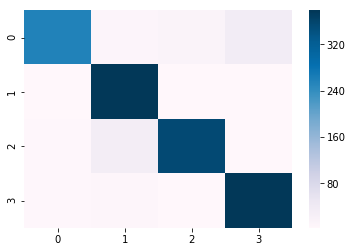

In [22]:
m = metrics.confusion_matrix(twenty_test.target, predicted)
sns.heatmap(m,cmap="PuBu")

From the chart, we can directly see the most confused newsgroups are atheism and Christianity are more often confused for one another than with computer graphics.

## Parameter tuning using grid search

Almost all the classifiers will have various parameters which can be tuned to reach the best performance. Such like use_idf in the TfidfTransformer. Or penalty parameter alpha.

We can also run the exhaustive search of the best parameters on a grid of possible values. In the ngram, we try unigram(each words), and bigrams. With or not idf, and we have the penalty (like offset) parameter of 0.1 or 0.001. By the different possible combinations, instead of tweak the parameters of multiple steps, we can try out all classifiers. And at last, we smooth the alpha.

However, this method will cost a lot, multiple core cpu will let this becomes easier to do, since it will deal with stuffs parallel.

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

We give n_jobs =1 since for that it can detect how many cores are installed and use all of them to increase the speed by trying put these parameter combinations in parallel since this search can be expensive.

In [24]:
gs_clf =GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)

Also, let's perform the search on a smaller subset to speed up the computation:

In [25]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


The object's best score and best params attributes store the best mean and the parameters setting corresponding to the result below:

In [26]:
gs_clf.best_score_                                  

0.9151349867929058

In [27]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 2)


From the result, By using grid search, we can find the best parameter of Naive Bayes(for this example, but we can also utilize it in the other model). Also, if we change the parameter of NB Classifier, and compare the result we get above, we can see the accuracy will increase.

An example of prediction:

In [28]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

## Conclusion

Basically, in this lab, I learned 3 things (2 methods and an extremely useful tool "GridSerachCV" from Scikit)of the Textual classification. 

I learned the concepts like bag of words, TFIDF and the algorithms NB and SVM. From the result after we change the parameter, we can get a similar result. 

The first model. It has 3 steps. Loading Dataset, extract features(we can use bags of words, tokenizing text, and tf-idf) After we have the features, we can train the classifier. To simplify the steps, we can build the pipeline to make vectorizer => transformer => classifier easier to work with. 

And then, we calculate the accuracy of prediction. See that we can improve by SVM, a set of supervised learning methods used for classification, regression and outliers detection. 

The third one is grid search. Instead of tweaking the parameters of the various components of the chain, we run an exhaustive search of the best parameters on a grid of possible values.

For improving the the Naive Bayes classifier, except using TF-IDF, we can also try removing stopwords, lemmatizing words and using n-grams.

As the conclusion, the SVM is a better text classification algorithms. It has the higher accuracy before we gridsearch, and easiest to take advantage of. However, grid search is expensive to work with but we can plug the best parameter into the model so that we can improve the accuracy. For my recommendations are using CNN text classifier in TensorFlow and RNN Sentence classification tutorial in Keras to see whether we can improve the accuracy and how much it costs.

Businesses are turning to text classification for structuring text in a fast and cost-efficient way to enhance decision-making and automate processes. And now it can use in such like social media monitoring or customer service and etc.